In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In this file we look at the classical three step model for HHG and try to estimate the cutoff energy.

In [12]:
Up = 0.22
omega = 0.057
E0 = 2*omega*np.sqrt(Up)

def position(theta, theta0):
    return E0/omega * (np.cos(theta) - np.cos(theta0) + (theta-theta0) * np.sin(theta0))

def recomb_times(theta, theta0):
    return np.cos(theta) - np.cos(theta0) + (theta-theta0) * np.sin(theta0)

In [151]:
def locate_sign_change(theta0, d_theta, max_theta, max_crossings=1):
    theta_i = theta0 + d_theta
    old_sign = np.sign(recomb_times(theta_i, theta0))
    cross_points = []

    while theta_i < max_theta:
        theta_i += d_theta
        new_sign = np.sign(recomb_times(theta_i, theta0))
        if new_sign != old_sign:
            cross_points.append(theta_i - d_theta)
            if len(cross_points) >= max_crossings:
                break
        old_sign = new_sign
    return cross_points

def locate_zero(theta_i, theta0, d_theta, err=1e-4, max_iter=1000):
    sign = np.sign(recomb_times(theta_i, theta0))
    theta_root = theta_i
    step_size = d_theta
    i = 1

    while True:
        i += 1
        theta_root_i = theta_root + step_size
        if np.sign(recomb_times(theta_root_i, theta0)) != sign:
            step_size /= 2
        else:
            theta_root = theta_root_i
        if step_size < err:
            #print(f'Precision reached at iteration {i}')
            break
        if i >= max_iter:
            #print('Max iterations reached - returning current result')
            break
        #print(theta_root)
    return theta_root

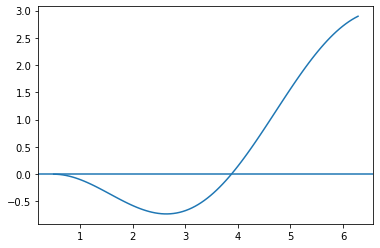

In [179]:
theta0 = 0.5
theta_list = np.linspace(theta0, 2*np.pi, 100)

plt.figure(facecolor='white')
plt.plot(theta_list, recomb_times(theta_list, theta0))
plt.axhline(0)

In [181]:
d_theta = 0.01

rough_roots = locate_sign_change(theta0, d_theta, 2*np.pi)

roots = []
for root in rough_roots:
    roots.append(locate_zero(root, theta0, d_theta, 1e-4))

print(rough_roots)
print(roots)

[3.8699999999999615]
[3.8770312499999613]


# Let's try to calculate for several theta0

In [175]:
theta0_list = np.linspace(0.01, np.pi/2, 100)[:-1]
d_theta = 0.01
root_list = []

for theta0 in theta0_list:
    rough_roots = locate_sign_change(theta0, d_theta, 2*np.pi)
    root_list.append(locate_zero(rough_roots[0], theta0, d_theta, 1e-4))

energy_list = [2 * (np.sin(theta_root) - np.sin(theta0))**2 for theta_root, theta0 in zip(root_list, theta0_list)]
print(f'Max energy : {max(energy_list)} Up')

Max energy : 3.172638819494193 Up


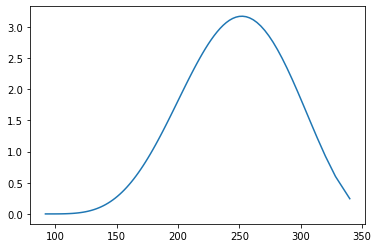

In [176]:
plt.figure(facecolor='white')
plt.plot(np.rad2deg(root_list), energy_list)